In [1]:
# Import Libraries
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Load Data

df_data = pd.read_csv("../data/data.csv")

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
 1   age     100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df_data.describe()

,height,age,weight
count,100.000000,100.000000,100.000000
mean,173.421683,41.060000,70.892423
std,6.502589,14.218937,10.304059
min,161.282309,18.000000,53.509479
25%,168.643831,27.500000,64.540218
50%,173.360984,41.500000,68.568890
75%,177.405328,53.250000,75.282786
max,187.965947,64.000000,104.436634


In [5]:
df_data.shape

(100, 3)

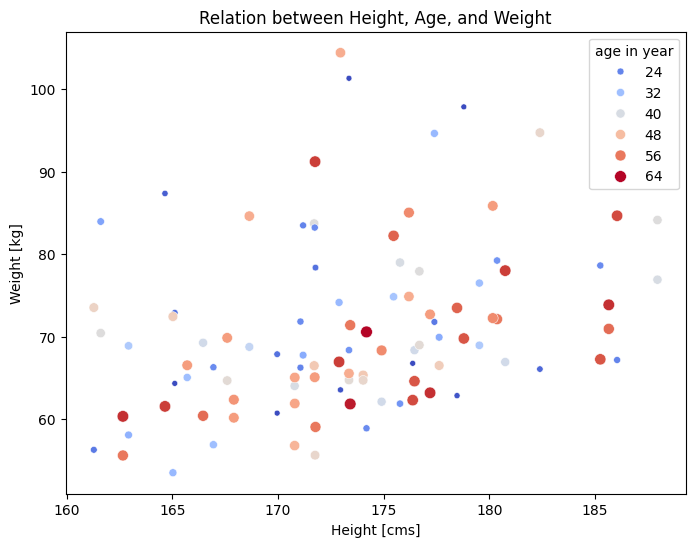

In [6]:
# Chart
plt.figure(figsize=(8,6)) # It is the Artboard
sb.scatterplot(x="height", y="weight", hue="age", size="age", data=df_data, palette="coolwarm") # It is the chart type with 3 variables, I put the 3rd variable in hue and size
plt.title("Relation between Height, Age, and Weight") # Title
plt.xlabel("Height [cms]") # Label name
plt.ylabel("Weight [kg]") # Label Name
plt.legend(title="age in year") # Title in legend
plt.show() # Diaplay chart

I can see a lot of dispersion, I should analize the correlation.

In [7]:
# Define correlation matriz with corr() function.
corr_matriz = df_data.corr()

In [8]:
print(corr_matriz)
print(type(corr_matriz))

          height       age    weight
height  1.000000  0.121928  0.309380
age     0.121928  1.000000 -0.082516
weight  0.309380 -0.082516  1.000000
<class 'pandas.core.frame.DataFrame'>


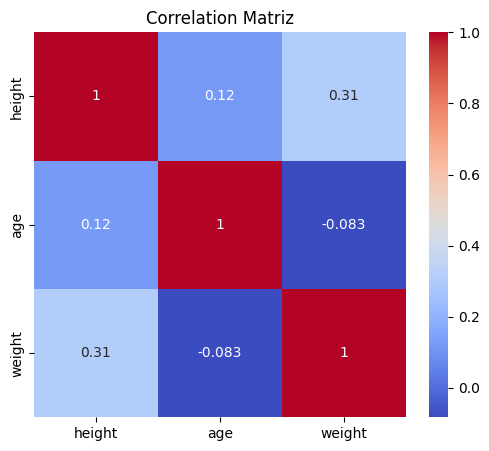

In [9]:
## Draw chart
plt.figure(figsize=(6, 5))
sb.heatmap(data=corr_matriz, annot=True, cmap="coolwarm")
plt.title("Correlation Matriz")
plt.show()

Correlation is weak, I will try to use Body Mass Index

In [10]:
# adding bmi new colum
df_data["bmi"] = df_data["weight"] / ((df_data["height"]/100) ** 2)

In [11]:
df_data.head()

,height,age,weight,bmi
0,178.476999,58,73.494661,23.072321
1,174.032150,46,65.344423,21.574938
2,179.533820,32,76.504891,23.735406
3,185.661209,62,73.865787,21.428955
4,173.360926,18,101.335282,33.717723


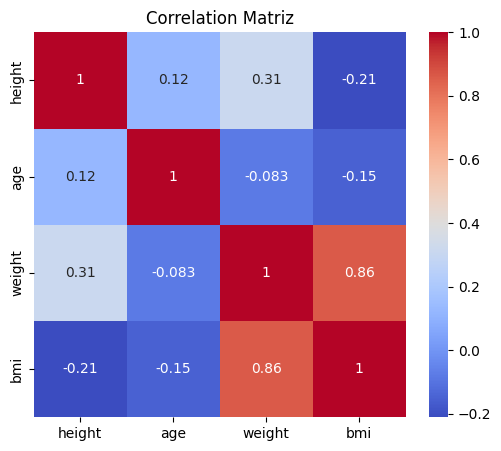

In [12]:
# Chart again
corr_matriz = df_data.corr()
plt.figure(figsize=(6, 5))
sb.heatmap(data=corr_matriz, annot=True, cmap="coolwarm")
plt.title("Correlation Matriz")
plt.show()

now there is a strong correlation between BMI and weight


In [13]:
# chacking shape

df_data.shape

(100, 4)

In [14]:
# Feature and Labels

X = df_data[["height", "age", "bmi"]]
y = df_data["weight"]

In [20]:
X_processed = X.values
y_processed = y.values

In [21]:
# Modeling

model = LinearRegression()

In [23]:
X_processed.shape

(100, 3)

In [24]:
# Training

model.fit(X_processed, y_processed)

LinearRegression()

In [25]:
# Prediction testing with unknown data

model.predict([[176,34,28.1]])

array([86.37731467])

In [26]:
model.score(X_processed, y_processed)

0.9958631908054157

it is accuracy because I am using bmi as a feature but bmi is consedering you weight, model works, but the logic behind is wrong